### TASK - 4

For the given iris dataset, create Descision Tree Classifier and visualize it. The purpose is as if we feed any new data to this, it will predict right class accordingly.

In [31]:
# Importing libraries
import sklearn.datasets as datasets
import pandas as pd

In [32]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))
df.shape



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


(150, 4)

In [33]:
# Targets
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Now let us define the Decision Tree Algorithm

In [34]:
# Forming train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,y)
x_train.shape, x_test.shape

((112, 4), (38, 4))

In [35]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [36]:
# Prediction 
pred = dtree.predict(x_test)
print(pred)

[1 2 0 0 1 2 2 0 0 0 2 0 2 0 1 1 0 1 1 0 2 0 2 1 2 0 0 2 2 2 1 1 0 2 1 2 2
 1]


In [37]:
# Checking the accuracy of the model
from sklearn.metrics import classification_report as cr
print(cr(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      0.91      0.91        11
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### Let us visualize the Decision Tree to understand it better.



In [38]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


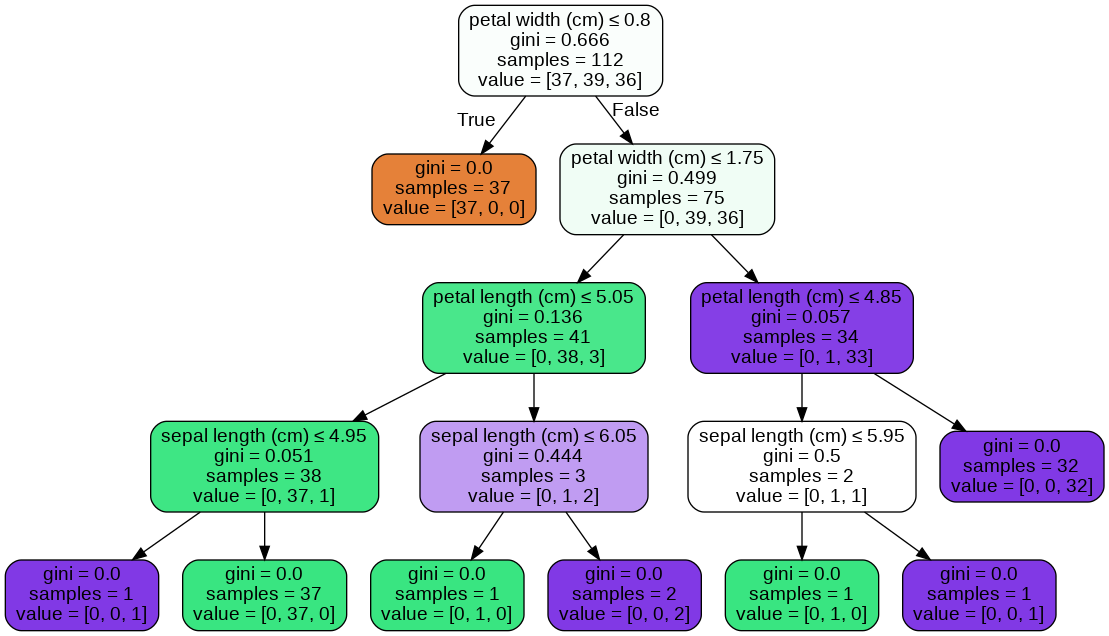

In [39]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())